## Polynomial Regression

In [1]:
# Importing the libraries

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Creating polyniomial dataset

X = torch.randn(1000)

coeffx2 = 0.5
coeffx1 = 0.4
bias = 0.3
y = (X**2)*coeffx2 + X*coeffx1 + bias

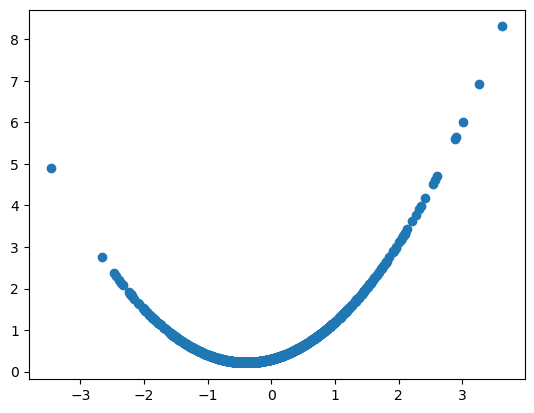

In [3]:
# Visualising the dataset

plt.scatter(X,y)

In [4]:
# Splitting the data into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    train_size = 0.8)

In [5]:
# Checking the length and shape of splits
len(X_train), len(y_train), len(X_test), len(y_test), X_train.shape, y_train.shape, X_test.shape, y_test.shape

(800,
 800,
 200,
 200,
 torch.Size([800]),
 torch.Size([800]),
 torch.Size([200]),
 torch.Size([200]))

In [6]:
# Creating the regression model

class PolynomialRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight2 = nn.Parameter(torch.rand(1,
                                               requires_grad = True
                                               ,dtype = torch.float)
                                   )
        self.weight1 = nn.Parameter(torch.rand(1,
                                               requires_grad = True
                                               ,dtype = torch.float)
                                   )
        self.bias = nn.Parameter(torch.rand(1,
                                               requires_grad = True
                                               ,dtype = torch.float)
                                )
    def forward(self, X:torch.Tensor)->torch.Tensor:
        return (X**2)*self.weight2 + X*self.weight1 + self.bias
        

In [7]:
# Initialising the model

model_1 = PolynomialRegressionModel()

In [8]:
# Checking model state before training

model_1.state_dict()

OrderedDict([('weight2', tensor([0.9416])),
             ('weight1', tensor([0.9062])),
             ('bias', tensor([0.9097]))])

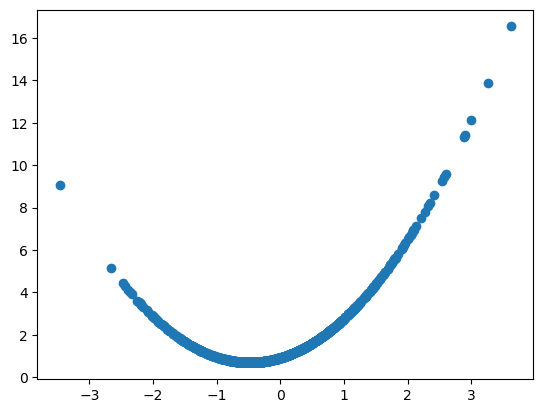

In [9]:
# Visualzising the untrained model's predicitions
y_preds_prev = model_1(X)

with torch.inference_mode():
    plt.scatter(X, y_preds_prev)

In [10]:
# Setting lossfn and optimizer

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [11]:
epochs = 100

for epoch in range(epochs):
    model_1.train()
    
    y_preds = model_1(X_train)
    
    loss = loss_fn(y_preds,y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_loss = model_1(X_test)
        test_loss = loss_fn(test_loss, y_test)
        
    if epoch%10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.5f}, Test_loss: {test_loss:.5f}")

Epoch: 0, Loss: 1.58654, Test_loss: 1.66604
Epoch: 10, Loss: 0.58731, Test_loss: 0.63415
Epoch: 20, Loss: 0.26975, Test_loss: 0.28891
Epoch: 30, Loss: 0.15226, Test_loss: 0.15691
Epoch: 40, Loss: 0.09847, Test_loss: 0.09704
Epoch: 50, Loss: 0.06829, Test_loss: 0.06494
Epoch: 60, Loss: 0.04891, Test_loss: 0.04541
Epoch: 70, Loss: 0.03558, Test_loss: 0.03255
Epoch: 80, Loss: 0.02611, Test_loss: 0.02369
Epoch: 90, Loss: 0.01927, Test_loss: 0.01741


In [12]:
# Checking model state after training

model_1.state_dict()

OrderedDict([('weight2', tensor([0.4570])),
             ('weight1', tensor([0.4830])),
             ('bias', tensor([0.4077]))])

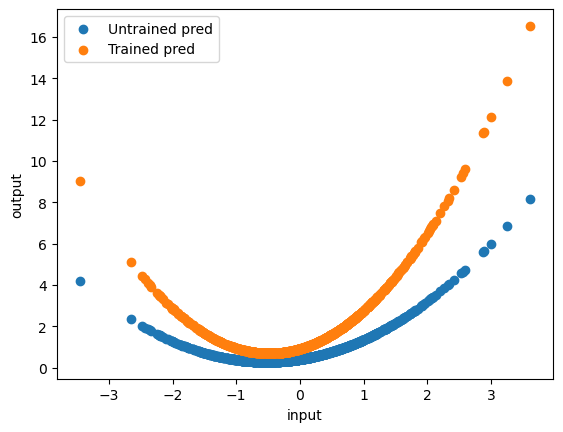

In [13]:
# Visualzising the untrained model's predicitions
y_preds = model_1(X)

with torch.inference_mode():
    plt.scatter(X,y_preds)
    plt.scatter(X,y_preds_prev)
    plt.xlabel('input')
    plt.ylabel('output')
    plt.legend(['Untrained pred','Trained pred'])
    